# **Welcome to the Data Analysis Workshop!**
In this notebook, we'll look at a variety of data cleaning, transformation, reduction, and visualization techniques that compose the intricate process of data analysis. We will learn what steps we can take to get the most out of our data and generate data that will be most useful and impactful when it comes to creating machine learning models. This notebook will act as a general guide in working with numerical data.

Language and Image data require additional preprocessing to generate some form of numerical data. For this reason, we begin the journey of data preprocessing with the most fundamental numerical data and will move onto the more advanced data types in the coming weeks. The techniques and exercises in this notebook are applicable to any **numerical data**.

In this notebook, we'll be working with education data that tries to answer the question: **How does parents background, test preparation etc. influence student test scores?**

## Loading our data

To best work with our data, we will utilize the `pandas` library, which allows Python to handle matrices of data called dataframes.

In [ ]:
#@title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Retreive our data from the cloud
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Education/Student%20Exam%20Performance/exam_performance.csv"

exam_performance.cs 100%[===================>]  70.35K  --.-KB/s    in 0s      


And now we load in our medical data, which is stored as a CSV here, as a pandas dataframe. To do so we use the `read_csv` method and examine the first few rows using the `head` method:

In [ ]:
#@title
student_data = pd.read_csv('exam_performance.csv')
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Here we examine some of the properties of our dataframe. First, the `shape` property gives us the number of rows and columns:

In [ ]:
#@title
student_data.shape

(1000, 8)

We generate the statistics using the `describe` method:

In [ ]:
#@title
student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


But this describes only 3 of the columns, while we learned from `shape` that we actually have 8. To see the issue, let's get some information about our data using the `info` method:

In [ ]:
#@title
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We see that we have five columns which consists of strings, and are therefore saved as columns. To deal with these strings, we first want to specify "category" as its type, since there are a limited number of options that each entry could be listed as. To do so, we reference the columns using the square bracket notation
```python
student_data["gender"]
```
and we make use of the `astype` method:

In [ ]:
#@title
student_data["gender"].astype("category")

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: category
Categories (2, object): ['female', 'male']

To replace the existing data with the categorical data, we *assign* this new data to our column.

In [ ]:
#@title
student_data["gender"] = student_data["gender"].astype("category")

But we have five columns to do this with, so rather than going through and repeating individuall, we will use a for loop to iterate through the variable `col`:

In [ ]:
#@title
for col in ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]:
  student_data[col] = student_data[col].astype("category")

student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


## Visualizing our data

Now that we have gathered some basic info about our data, let us learn more through some simple visualizations. Here we will be using the `seaborn` library, one of the primary visualization tools available for python. 

To start off, let us plot some histograms so we can see the distributions of scores. We will start with the math score:

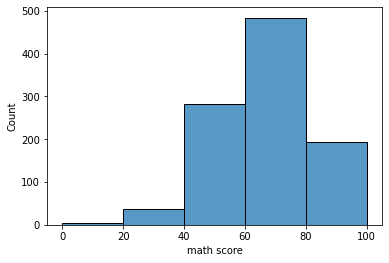

In [ ]:
#@title
sns.histplot(student_data['math score'],bins=5);

Now we may want to compare the distribution of math scores with the distribution of reading and writing scores. With another visualization library `matplotlib` we are able to compare the three directly:

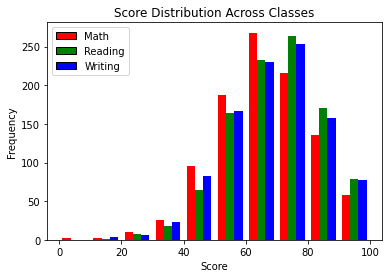

In [ ]:
#@title
# Set up info for use in the legend
from matplotlib.patches import Rectangle
colors =['r','g','b']
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Math", "Reading", "Writing"]

# Plot our histograms
plt.title("Score Distribution Across Classes")
plt.hist([student_data['math score'], student_data['reading score'],student_data['writing score']], color=colors)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend(handles, labels);

## Filtering our data

Lets take a look at the students with the highest math scores and those with the lowest math scores and see if we notice anything about these distributions:

In [ ]:
#@title
sorted_df = student_data.sort_values(by="math score", ascending=False)
print("Max math scores:\n")
sorted_df.head(10)

Max math scores:



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
149,male,group E,associate's degree,free/reduced,completed,100,100,93
916,male,group E,bachelor's degree,standard,completed,100,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
114,female,group E,bachelor's degree,standard,completed,99,100,100


In [ ]:
#@title
print("Min math scores:\n")
sorted_df.tail(10)

Min math scores:



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
91,male,group C,high school,free/reduced,none,27,34,36
363,female,group D,some high school,free/reduced,none,27,34,32
466,female,group D,associate's degree,free/reduced,none,26,31,38
338,female,group B,some high school,free/reduced,none,24,38,27
842,female,group B,high school,free/reduced,completed,23,44,36
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23
59,female,group C,some high school,free/reduced,none,0,17,10


**What do you notice about these two groups?**

Lets say that we want to explore the distributions for students with standard lunches and those with free/reduced lunches. To do so, we will filter our data into two datasets using a *conditional statement*:

In [ ]:
#@title
standard_df = student_data[student_data['lunch'] == "standard"]
free_df = student_data[student_data['lunch'] == "free/reduced"]

Now lets find the score distributions of these two filtered datasets:

In [ ]:
#@title
standard_df.describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [ ]:
#@title
free_df.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


To more easily compare these statistics we will use a *box plot* to view the mean, 25th and 75th percentiles, and the max and min.

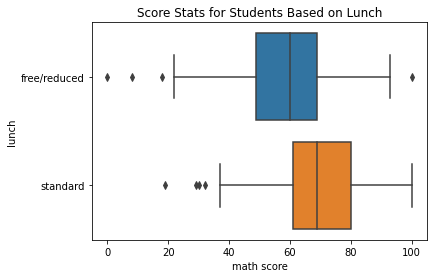

In [ ]:
#@title
sns.boxplot(x='math score', y='lunch', data=student_data).set(title='Score Stats for Students Based on Lunch');

## Recoding our data

Now, lets say that we want to feed the `lunch` variable into our model, but because it uses a string for each category we aren't able to. In this case, we may want to *encode* our variable.

First, we will add a new column for whether or not the student qualifies for free/reduced lunch. To add a column we use:

In [ ]:
#@title
student_data["Dummy column"] = 0
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Dummy column
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,0


And to drop a column we use the `drop` function:

In [ ]:
#@title
student_data.drop('Dummy column', axis=1, inplace=True)

Now we will add a column to encode whether or not the student qualifies for free lunch:

In [ ]:
#@title
student_data['free lunch'] = np.where(student_data['lunch'] == "free/reduced", 1, 0)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,free lunch
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,0


And now lets try a more complicated encoding - the parental level of education. We can encode this column by associating each level with a number. We can assign the parental education into a new column and use the `replace` method to swap each level with a number.

In [ ]:
#@title
encoding = [1,2,3,4,5,6]
edu_level = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

student_data['parental education'] = student_data['parental level of education'].replace(edu_level, encoding)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,free lunch,parental education
0,female,group B,bachelor's degree,standard,none,72,72,74,0,5
1,female,group C,some college,standard,completed,69,90,88,0,3
2,female,group B,master's degree,standard,none,90,95,93,0,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,4
4,male,group C,some college,standard,none,76,78,75,0,3


<font color="#6495ED"><h1><b>That's it for numerical data analysis!</b></h1></font> 
<h4>Like we said earlier, there are a number of ways to analyze data before sending it to your model, and here we've just covered some. Hopefully this will help you know how to begin your project code! </h4>